# Getting the Dataset

The data is provided by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.
It include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):
•	Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

•	**LandAverageTemperature:** global average land temperature in celsius

•	**LandAverageTemperatureUncertainty:** the 95% confidence interval around the average

•	**LandMaxTemperature:** global average maximum land temperature in celsius

•	**LandMaxTemperatureUncertainty:** the 95% confidence interval around the maximum land temperature

•	**LandMinTemperature:** global average minimum land temperature in celsius

•	**LandMinTemperatureUncertainty:** the 95% confidence interval around the minimum land temperature

•	**LandAndOceanAverageTemperature:** global average land and ocean temperature in celsius

•	**LandAndOceanAverageTemperatureUncertainty:** the 95% confidence interval around the global average land and ocean temperature

Other files include:
•	Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)

•	Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)

•	Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)

•	Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)

**Dataset url = 'https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data'**

There are several options for getting the dataset into Jupyter:

Download the CSV manually and upload it via Jupyter's GUI Use the urlretrieve function from the urllib.request to download CSV files from a raw URL directly Use a helper library e.g. opendatasets, which contains a collection of curated datasets and provides a function for directly download. We'll use the opendatasets helper library to download the files.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
pip install chart-studio

     |████████████████████████████████| 64 kB 3.0 MB/s eta 0:00:011
     |████████████████████████████████| 15.2 MB 12.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=9e1782d44228993a183bc35767e7f945e60ff0ef5f746d7a43862cebe0f2df3a
  Stored in directory: /home/jovyan/.cache/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset_url = 'https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohdadnan123
Your Kaggle Key: ········


100%|██████████| 84.7M/84.7M [00:01<00:00, 56.6MB/s]


# Importing Libraries

In [5]:
import numpy as np #it consists of multidirectional array objects
import pandas as pd #used for data cleaning and pre-processing
import matplotlib.pyplot as plt #used for plotting figures,graphs etc
import seaborn as sns #consist of various functions like Barplot(),Count Plot(),Heat Map etc.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import accuracy_score

%matplotlib inline

## Data Preparation and Cleaning
In this section we will first load the downloaded dataset in data frame using pandas. Then we will read these datasets using read_csv function. We will explore our data through various columns and rows and find some missing or null values in our data and will clean or replace the irrelevant data wherever necessary.

In [6]:
data_dir='./climate-change-earth-surface-temperature-data'

In [7]:
import os
os.listdir(data_dir)

['GlobalLandTemperaturesByCountry.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalTemperatures.csv',
 'GlobalLandTemperaturesByMajorCity.csv',
 'GlobalLandTemperaturesByCity.csv']

In [8]:
dataset_temp=pd.read_csv('./climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

### Exploring the data

In [9]:
dataset_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [10]:
dataset_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset_temp.shape

(3192, 9)

In [12]:
dataset_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [13]:
dataset_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [14]:
dataset_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [15]:
# method of checking null values
dataset_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [16]:
sort_by_temp_desc = dataset_temp.sort_values('LandAverageTemperature', ascending=False)
sort_by_temp_desc

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
138,1761-07-01,19.021,2.696,NaN,NaN,NaN,NaN,NaN,NaN
91,1757-08-01,17.910,4.035,NaN,NaN,NaN,NaN,NaN,NaN
90,1757-07-01,17.610,4.322,NaN,NaN,NaN,NaN,NaN,NaN
89,1757-06-01,17.115,4.590,NaN,NaN,NaN,NaN,NaN,NaN
137,1761-06-01,16.821,3.166,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1752-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset_temp = dataset_temp[['dt', 'LandAndOceanAverageTemperature']]
dataset_temp.dropna(inplace=True)
dataset_temp['dt'] = pd.to_datetime(dataset_temp.dt).dt.strftime('%d/%m/%Y')
dataset_temp['dt'] = dataset_temp['dt'].apply(lambda x:x[6:])
dataset_temp = dataset_temp.groupby(['dt'])['LandAndOceanAverageTemperature'].mean().reset_index()

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_57/1476481384.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_57/1476481384.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
dataset_temp

,dt,LandAndOceanAverageTemperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000
...,...,...
161,2011,15.769500
162,2012,15.802333
163,2013,15.854417
164,2014,15.913000


# Data Visualiztaion

**Plotting Relationships in Dataset**

There are various ways to dispaly the relationships in dataset.We can use pairplot,joint plots, correlations etc.
I am using pairplot to find out relationships in dataset

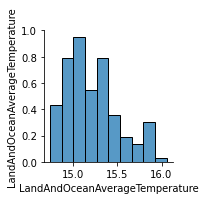

In [19]:
sns.pairplot(dataset_temp)

# Plotting Correlation
correlation is an indication about the changes between two variables

In [20]:
#finding pairwise correlation in our dataframe
dataset_temp.corr()

,LandAndOceanAverageTemperature
LandAndOceanAverageTemperature,1.0


In [ ]:
matrix=dataset_temp.corr()
ax=plt.subplots(figsize=(6,3)),sns.heatmap(matrix,vmax=0.8,square=True,cmap="coolwarm")

In [ ]:
plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = dataset_temp['dt'],
    y = dataset_temp['LandAndOceanAverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### The above visualisation shows a clear upward trend in the average global temperature over the past years

Please be mindful that the data in the early years (1750) is likely to be a little less accurate due to the limits of the record keeping at the time

### Now I'll use machine learning to predict the future average global temperature

In [ ]:
dataset_temp

In [ ]:
# Preparing the data for machine learning
X = dataset_temp.iloc[:, dataset_temp.columns != 'LandAndOceanAverageTemperature'].values
y = dataset_temp.iloc[:, dataset_temp.columns == 'LandAndOceanAverageTemperature'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

In [ ]:
# Fitting a linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [ ]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [ ]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

In [ ]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [ ]:
# Building the predictor
X_predict = [2050] # Enter the year that you require the temperature for
X_predict = np.array(X_predict).reshape(1, -1)
y_predict = regressor.predict(X_predict)

# Outputting the predicted temperature of the year above
y_predict

The average global temperature is likely to increase to 15.84 degrees celcius by 2050. That is an increase of circa 0.2 degrees between now and then and this is taking into account the combination average of sea and land temperatures.

In [ ]:
jovian.commit()